# Neural Networks for Pima Indian dataset

### Import packages

In [1]:
import pandas as pd
import os
import data
from model import MLP
import tensorflow as tf

In [2]:
#TensorFlow version
print(tf.__version__)

1.5.0


### Retrieve imputed train and test sets 

In [3]:
currentPath = os.getcwd()
test_list = data.testImputed(currentPath=currentPath)
train = data.trainImputed(currentPath=currentPath)

Split Outcome into two columns instead of 1, Diabetic and Not_Diabetic

In [4]:
#For train
train["Not Diabetic"] = (train["Outcome"] == 0).astype(int)
train.rename(columns={"Outcome": "Diabetic"}, inplace=True)

#For test
for i in range(len(test_list)):
    test_list[i]["Not Diabetic"] = (test_list[i]["Outcome"] == 0).astype(int)
    test_list[i].rename(columns={"Outcome": "Diabetic"}, inplace=True)

In [5]:
X_train = train.as_matrix()[:,0:-2]
y_train = train.as_matrix()[:, -2:]
X_test = test_list[0].as_matrix()[:,0:-2]
y_test = test_list[0].as_matrix()[:,-2:]

In [119]:
import model
reload(model)
from model import MLP

In [120]:
mlp = MLP()
mlp.buildModel(neurons=[200,500,100], activations=["relu", "relu", "relu"], 
               dropout=[0.9,0.9,0.9], inputDim=X_train.shape[1], outputDim=y_train.shape[1])

Epoch 1 : Training loss: 5.07416629791, 
 test accuracy : 0.62857145071

Epoch 11 : Training loss: 0.604254484177, 
 test accuracy : 0.514285743237

Epoch 21 : Training loss: 0.591890096664, 
 test accuracy : 0.600000023842

Epoch 31 : Training loss: 0.65465092659, 
 test accuracy : 0.600000023842

Epoch 41 : Training loss: 0.603694558144, 
 test accuracy : 0.714285731316

Epoch 51 : Training loss: 0.563479781151, 
 test accuracy : 0.714285731316

Epoch 61 : Training loss: 0.592270672321, 
 test accuracy : 0.642857134342

Epoch 71 : Training loss: 0.660480558872, 
 test accuracy : 0.699999988079

Epoch 81 : Training loss: 0.589952707291, 
 test accuracy : 0.685714304447

Epoch 91 : Training loss: 0.619129419327, 
 test accuracy : 0.671428561211



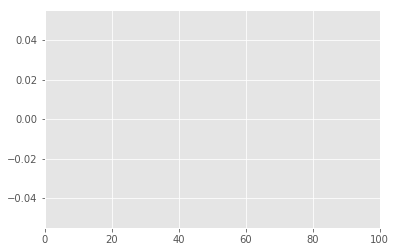

In [121]:
%matplotlib inline
mlp.train(X=X_train, y=y_train, X_test=X_test, y_test=y_test, num_epochs=100)

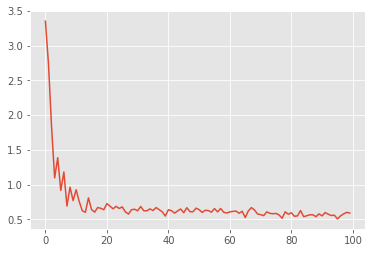

In [115]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(training_loss)